In [46]:
import pandas as pd
import numpy as np


In [47]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

In [48]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [49]:
df.dropna(inplace=True)

In [50]:
df.shape

(714, 3)

In [51]:
df.shape

(714, 3)

In [52]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [53]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
clf=DecisionTreeClassifier()

In [56]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [57]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [58]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6317292644757433)

In [59]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [60]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [61]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.fit_transform(x_test)

In [62]:
trf.named_transformers_['first'].n_bins_

array([15])

In [63]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.        ,   7.17166667,   7.77333333,   7.925     ,
                8.05      ,   9.5       ,  10.5       ,  13.        ,
               17.69333333,  22.62      ,  26.35276667,  31.275     ,
               38.1       ,  53.22666667,  79.27666667, 512.3292    ])],
      dtype=object)

In [64]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [65]:
output['age_labels']=pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [66]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
350,23.0,5.0,9.2250,4.0,"(21.0, 24.0]","(8.05, 9.5]"
318,31.0,8.0,164.8667,14.0,"(30.1, 33.667]","(79.277, 512.329]"
822,38.0,11.0,0.0000,0.0,"(36.0, 38.6]",NaN
569,32.0,9.0,7.8542,2.0,"(30.1, 33.667]","(7.773, 7.925]"
38,18.0,2.0,18.0000,7.0,"(17.0, 20.0]","(17.693, 22.62]"


In [67]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2=clf.predict(x_test_trf)

In [68]:
accuracy_score(y_test,y_pred2)

0.6503496503496503

In [70]:
X_trf=trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6316901408450704)

In [73]:
def descretize(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf=ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1]),
    ])

    X_trf=trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring="accuracy")))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('After')

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('After')

    plt.show()



0.6288928012519561


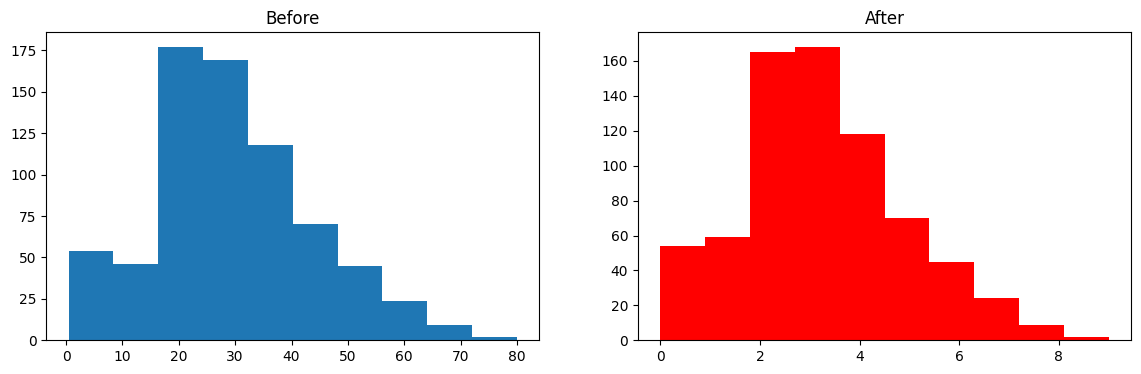

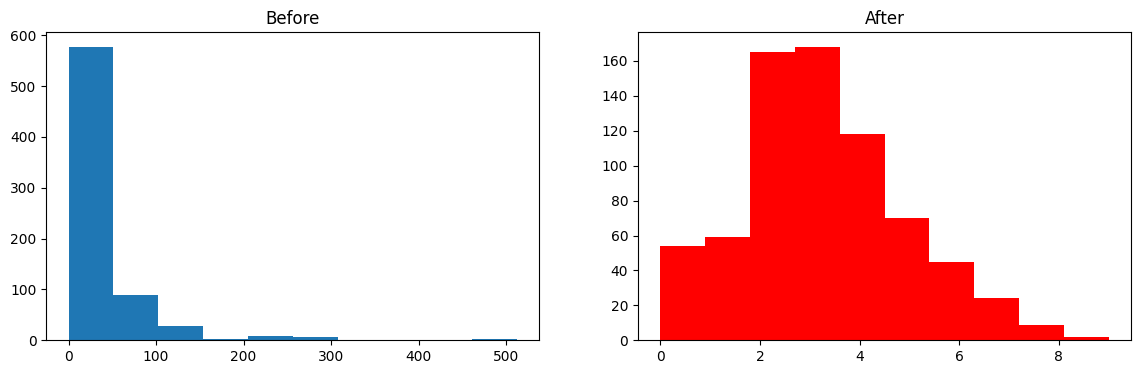

In [76]:
descretize(10,'kmeans')